1. implement linear SVM algorithm on final boards classification and single label classification.
2. repeat for KNN and multilayer perceptron.
3. write a single program that outputs accuracy and confusion matrices for both datasets and for all the classifiers.

In [ ]:
# import libraries
import pandas as pd
import numpy as np
import sklearn

# dataset paths
final_txt_path = "./datasets/tictac_final.txt"
multi_txt_path = "./datasets/tictac_multi.txt"
single_txt_path = "./datasets/tictac_single.txt"

In [6]:
df1 = pd.read_csv("./datasets/tictac_final.txt")

In [10]:
print("Rows and columns:" , df1.shape)

Rows and columns: (957, 1)


In [7]:
df2 = pd.read_csv("./datasets/tictac_multi.txt")

In [11]:
print("Rows and columns:" , df2.shape)

Rows and columns: (6550, 1)


In [8]:
df3 = pd.read_csv("./datasets/tictac_single.txt")

In [12]:
print("Rows and columns:" , df3.shape)

Rows and columns: (6550, 1)


#check null values

In [13]:
print("Dataset 1 has missing values:", df1.isnull().values.any())

Dataset 1 has missing values: False


In [14]:
print("Dataset 2 has missing values:", df2.isnull().values.any())

Dataset 2 has missing values: False


In [15]:
print("Dataset 3 has missing values:", df3.isnull().values.any())

Dataset 3 has missing values: False


In [19]:
df1.describe(include='object')

,+1 +1 +1 +1 -1 -1 +1 -1 -1 +1
count,957
unique,957
top,+1 +1 +1 +1 -1 -1 -1 +1 -1 +1
freq,1


+1+1+1+1-1-1-1-1-1+1: This is the string of characters that appears 957 times in the file.

count: This shows the total count of the string, which is 957.

unique: This indicates that there are 957 unique strings in the file, meaning each string is different.

top: This is the most frequent string, which is the same string mentioned above.

freq: This shows the frequency of the top string, which is 1, meaning it appears only once in the file.


In [20]:
df2.describe(include='object')

,1 -1 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 1
count,6550
unique,3903
top,1 0 1 0 0 0 0 -1 0 0 1 0 1 1 1 1 0 1
freq,2


In [21]:
df3.describe(include='object')

,1 -1 0 0 0 0 0 1 0 6
count,6550
unique,3903
top,1 0 1 0 0 0 0 -1 0 1
freq,2


This code defines a function called get_test_train(path) that reads data from a file at the specified path, processes it into features (X) and target labels (y), and then splits the dataset into training and test sets using the train_test_split function from scikit-learn.

In [39]:
from sklearn.model_selection import train_test_split

def get_test_train(path):
    data_set = open(path,"r")
    # build x and y 
    X = []
    y = []
    for line in data_set:
        temp = line.rstrip().split(" ")
        X.append(temp[:9])
        if len(temp) == 10:
            y.append(temp[-1])
        else:
            y.append(temp[-9:])
    # split into train and test
    X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,shuffle=True)
    return X_train, X_test, y_train, y_test

Classifier Functions

In [40]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# create function to get accuracy and plot confusion matrix
def get_stats(actual, pred, title, cmap=plt.cm.gray_r):
    accuracy = sklearn.metrics.accuracy_score(actual, pred, normalize=True)
    
    a = pd.Series(actual, name='Actual')
    p = pd.Series(pred, name='Predicted')
    df_confusion = pd.crosstab(a, p)
    
    plt.matshow(df_confusion, cmap=cmap) # imshow
    plt.colorbar()
    tick_marks = np.arange(len(df_confusion.columns))
    plt.xticks(tick_marks, df_confusion.columns, rotation=45)
    plt.yticks(tick_marks, df_confusion.index)
    plt.ylabel(df_confusion.index.name)
    plt.xlabel(df_confusion.columns.name)
    title = title + f" (Accuracy: {round(accuracy, 4)})"
    plt.title(title)
    plt.show()

In [41]:
from sklearn.model_selection import ShuffleSplit, cross_val_score

def clf_pipeline(model, path, title, transform_X=True):
    # get testing data
    X_train, X_test, y_train, y_test = get_test_train(path)
    if transform_X:
        X_train = np.array(X_train, dtype=np.float64)
        X_test = np.array(X_test, dtype=np.float64)
    # get cross-validation score
    cv = ShuffleSplit(n_splits=10, test_size=0.3, random_state=0)
    score = cross_val_score(model, X_train, y_train, cv=cv)
    print(f"Cross Validation Scores:\n{score}")
    # fit model
    model.fit(X_train, y_train)
    y_hat = model.predict(X_test)
    # print out stats
    get_stats(y_test, y_hat, title)

# Classification: Linear SVM - Final Board State and Optimal Single Move

Final Board State: This involves building a classifier that can predict the state of the game, whether it's a win, loss, or draw (or a similar set of possible outcomes).

Predicting the Optimal Single Move: For determining the optimal move, you would typically need to evaluate each possible move (for the current player) and assign a score to each one


In [43]:
from sklearn import svm, metrics
clf = svm.SVC(C=1)

clf_pipeline function:

The clf_pipeline function is likely a custom function that handles the workflow for training a model (in this case, an SVM model) and possibly evaluating its performance. While the code for clf_pipeline is not provided, we can infer from the parameters that it likely performs tasks like:
Loading the dataset.
Preprocessing the data.
Training the classifier (in this case, clf, which is an SVM model).
Evaluating the model's performance.
Generating metrics or visualizations (like confusion matrix, accuracy)

Cross Validation Scores:
[0.98611111 0.98148148 0.99074074 0.99074074 0.97685185 0.98611111
 0.99537037 0.98611111 0.98611111 0.98148148]


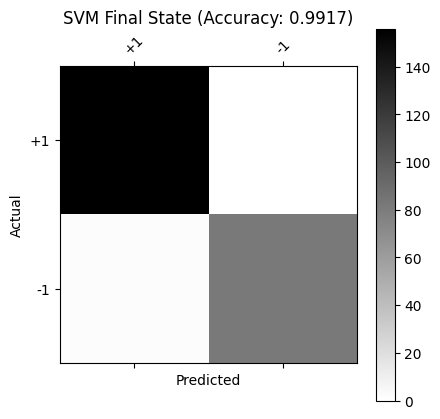

In [44]:
clf_pipeline(clf, "./datasets/tictac_final.txt", "SVM Final State")


Why Use joblib?
Efficiency: joblib is optimized for saving and loading large numerical data efficiently, which is useful for machine learning models that can be large (due to parameters, support vectors, etc.).
Persistence: It allows you to save the trained model to a disk and reuse it later, which is especially useful in production systems where you don't want to retrain models every time you need to use them.

In [45]:
from joblib import dump, load
dump(clf, 'svm_clf_final.joblib')

['svm_clf_final.joblib']

 clf = svm.SVC(C=1) builds a Support Vector Classifier (SVC) model with C=1 using the Support Vector Machine (SVM) algorithm from scikit-learn. This model is designed to classify data into different categories based on a hyperplane that best separates the classes in the feature space.

In [46]:
# build model
clf = svm.SVC(C=1)

This function will train the model, evaluate its performance using cross-validation, and plot the confusion matrix with the accuracy score.

Cross Validation Scores:
[0.78629579 0.79647218 0.81411126 0.79850746 0.80393487 0.79579376
 0.79240163 0.77408412 0.79579376 0.78358209]


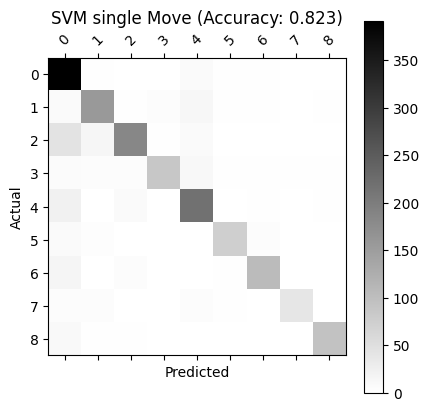

In [12]:
clf_pipeline(clf, "./datasets/tictac_single.txt", "SVM single Move")


saves the trained Support Vector Machine (SVM) model (clf) to a file called svm_clf_single.joblib using the joblib library. This allows you to save the model after training and load it later to make predictions without needing to retrain it.

In [48]:
dump(clf, 'svm_clf_single.joblib')

['svm_clf_single.joblib']

# Classification: KNN - Final Board State and Optimal Single Move

KNN is a simple and widely used machine learning algorithm. It classifies a data point based on how its neighbors are classified, meaning it looks at the k closest data points and uses a majority voting mechanism to predict the class of the target point.

In [47]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3, weights='distance')

Cross Validation Scores:
[0.99074074 0.99537037 0.99074074 0.99537037 0.99074074 0.98148148
 0.99537037 1.         0.99537037 0.98611111]


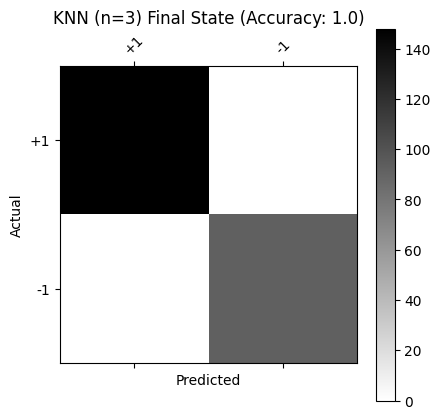

In [49]:
clf_pipeline(knn, "./datasets/tictac_final.txt", "KNN (n=3) Final State")

In [50]:
dump(knn, 'knn_clf_final.joblib')

['knn_clf_final.joblib']

In [51]:
knn = KNeighborsClassifier(n_neighbors=3, weights='distance')

Cross Validation Scores:
[0.79850746 0.78561737 0.77951153 0.78493894 0.8046133  0.78561737
 0.78222524 0.77204885 0.807327   0.79443691]


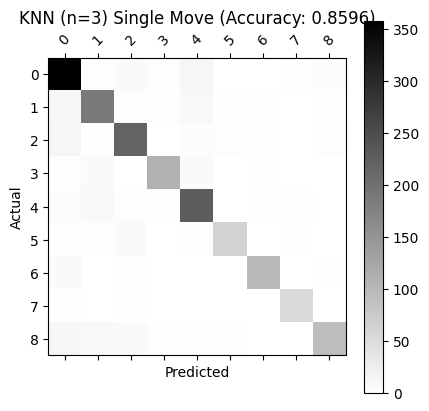

In [52]:
clf_pipeline(knn, "./datasets/tictac_single.txt", "KNN (n=3) Single Move", transform_X=True)

In [53]:
dump(knn, 'knn_clf_single.joblib')

['knn_clf_single.joblib']

# Classification: MLP - Final Board State and Optimal Single Move

MLP is a type of artificial neural network (ANN) that consists of multiple layers of neurons, typically with an input layer, one or more hidden layers, and an output layer. MLP is used for classification tasks and is a type of feedforward neural network, where the data flows in one direction, from input to output.

In [54]:
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(random_state=1, max_iter=600)

Cross Validation Scores:
[0.97685185 0.97685185 0.99537037 0.97685185 0.97685185 1.
 0.97685185 1.         0.97685185 0.97685185]


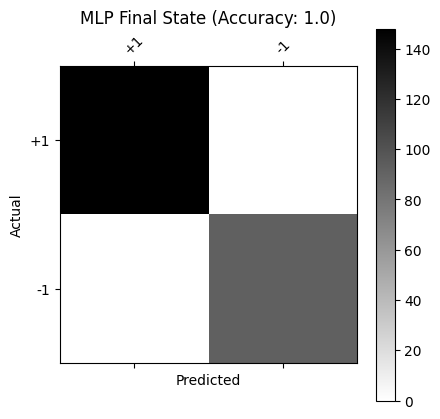

In [55]:
clf_pipeline(mlp, "./datasets/tictac_final.txt", "MLP Final State", transform_X=True)

In [56]:
dump(mlp, 'mlp_clf_final.joblib')

['mlp_clf_final.joblib']

In [57]:
mlp = MLPClassifier(random_state=1, max_iter=2000)

Cross Validation Scores:
[0.89348711 0.89416554 0.89552239 0.88398915 0.89620081 0.87720488
 0.89755767 0.89280868 0.89823609 0.89620081]


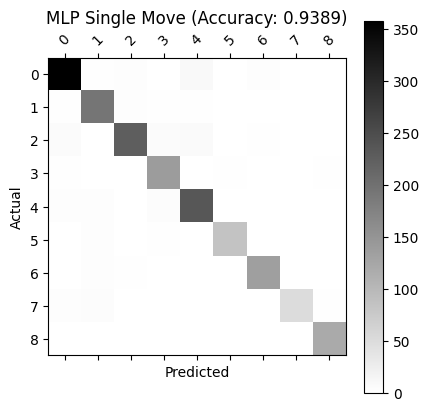

In [58]:
clf_pipeline(mlp, "./datasets/tictac_single.txt", "MLP Single Move", transform_X=True)

In [59]:
dump(mlp, 'mlp_clf_single.joblib')

['mlp_clf_single.joblib']

# Regression Functions

In [60]:
from sklearn.metrics import root_mean_squared_error

def get_reg_stats(actual, pred):
    accuracy = sklearn.metrics.accuracy_score(actual, pred, normalize=True)
    print(f"Accuracy:\n{accuracy}")
    rmse = root_mean_squared_error(actual, pred)
    print(f"RMSE:\n{round(rmse,4)}")

In [61]:
from sklearn.model_selection import ShuffleSplit, cross_val_score

def reg_pipeline(model, path, transform=True):
    # get testing data
    X_train, X_test, y_train, y_test = get_test_train(path)
    if transform:
        X_train = np.array(X_train, dtype=np.float64)
        X_test = np.array(X_test, dtype=np.float64)
        y_train = np.array(y_train, dtype=np.float64)
        y_test = np.array(y_test, dtype=np.float64)
    # get cross-validation score
    cv = ShuffleSplit(n_splits=10, test_size=0.3, random_state=0)
    score = cross_val_score(model, X_train, y_train, cv=cv)
    print(f"Cross Validation Scores:\n{score}")
    # fit model
    model.fit(X_train, y_train)
    y_hat = model.predict(X_test)
    for arr in y_hat:
        for i in range(len(arr)):
            if arr[i] >= 0.5:
                arr[i] = 1
            else:
                arr[i] = 0
    # print out stats
    get_reg_stats(y_test, y_hat)

# Regression: KNN - Optimal Multi Move

In [62]:
from sklearn.neighbors import KNeighborsRegressor
knn_reg = KNeighborsRegressor(n_neighbors=2,weights="distance")

In [63]:
reg_pipeline(knn_reg, "./datasets/tictac_multi.txt")

Cross Validation Scores:
[0.61617311 0.57074074 0.57176825 0.57022029 0.55868648 0.58976724
 0.60199986 0.56408357 0.60579905 0.59678221]
Accuracy:
0.7142857142857143
RMSE:
0.2795


In [64]:
from joblib import dump, load
dump(knn_reg, 'knn_reg.joblib')

['knn_reg.joblib']

# Regression: Linear - Optimal Multi Move

In [65]:
from sklearn.multioutput import MultiOutputRegressor
from sklearn.linear_model import LinearRegression
l_reg = MultiOutputRegressor(LinearRegression())

In [66]:
reg_pipeline(l_reg, "./datasets/tictac_multi.txt")

Cross Validation Scores:
[-0.00077201  0.00081301  0.00218712 -0.00270432  0.00029512  0.00117598
  0.00134126 -0.00056318 -0.00046004  0.00124193]
Accuracy:
0.0
RMSE:
0.4672


In [67]:
from joblib import dump, load
dump(l_reg, 'l_reg.joblib')

['l_reg.joblib']

# Regression: MLP - Optimal Multi Move

In [68]:
from sklearn.neural_network import MLPRegressor
mlp_reg = MLPRegressor(hidden_layer_sizes=(400,400), max_iter=1000)

In [69]:
reg_pipeline(mlp_reg, "./datasets/tictac_multi.txt")

Cross Validation Scores:
[0.72921114 0.72003762 0.70325261 0.7172992  0.71818274 0.71234105
 0.71596522 0.70638411 0.70711395 0.71704309]
Accuracy:
0.8485958485958486
RMSE:
0.1579


In [70]:
from joblib import dump, load
dump(mlp_reg, 'mlp_reg.joblib')

['mlp_reg.joblib']